# Inputs (See instructions below)

### For all analysis:

In [1]:
## Beam parameter
A_ion = 39.948
Q_ion = 9
KE_per_u = 12e3  # eV/u

## Online or Offline use
perform_scan = False    # True for real-time scan, False for offline data analysis
data_file = 'FE_LEBT_ASx_D0739_20190222_123444_RawData.out'          # Must input data_file if perform_scan = False

beamline = 'artemis'    # artemis or venus

## Post-processing parameters
threshold_sigma = 2     # Threshold = noise_avg + threshold_sigma*noise_sd
noise_gradient = True   # Whether to perform voltage-dependent noise removal
correction = 'Weight'   # 'Weight' or 'PhaseSpace', correction scheme for transmission ratio

### Performing scan only:

In [2]:
x_or_y = 'x'            # Select scan direction. Horizontal: x, Vertical: y

## Scan Setup
position_range = [-15, 25, 1.]     # min, max, step size; typical x-range: -15 to 25   ; typical y-range: -15 to 25
voltage_range = [-500, 500, 20]    # min, max, step size; typical x-range: -500 to 500 ; typical y-range: -500 to 500

### Checklist
#### First Check ion A and Q
#### - Offline analysis: set perform_scan = False, specify data_file
#### - Performing scan: set perform_scan = True, select scanner direction and specify scan ranges

### After setting inputs, run all cells (Top Menu Bar: "Kernel" > "Restart & Run All")

# Scanning & Analysis

In [3]:
if not perform_scan:
    assert data_file != ''

### Import Scripts & Notebook Setup

In [4]:
if perform_scan:
    import sys
    sys.path.append('/files/shared/ap/phyapp_notebooks')
    
    from datetime import datetime
    time = datetime.now().strftime("%Y%m%d_%H%M%S")

import AllisonScannerAnalysis

In [5]:
%matplotlib inline

### Set Up Artemis Model

In [6]:
scanner = AllisonScannerAnalysis.FribASModel(beamline = beamline,
                                             A_ion = A_ion,
                                             Q_ion = Q_ion,
                                             KE_per_u = KE_per_u)

print('Voltage-angle conversion: 100V -> %.4f mrad' % (scanner.xp_from_V(100)[1]*1000))

Voltage-angle conversion: 100V -> 8.8486 mrad


### Perform Scan

In [7]:
if perform_scan:
    
    dict_name = beamline + '_' + x_or_y
    pv_dict = AllisonScannerAnalysis.pv_dict[dict_name]
    
    scan = AllisonScannerAnalysis.ASScan(pos = position_range, 
                                         vol = voltage_range, 
                                         x_or_y = x_or_y, 
                                         pv_dict = pv_dict,
                                         time = time)

### Data Analysis

In [ ]:
if perform_scan:
    data_grid = AllisonScannerAnalysis.ASGridFRIB(perform_scan = True, 
                                                  live_data = scan.output_data, 
                                                  time = time)
else:
    data_grid = AllisonScannerAnalysis.ASGridFRIB(perform_scan = False, 
                                                  data_file = data_file)

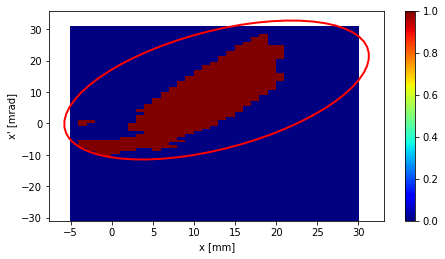

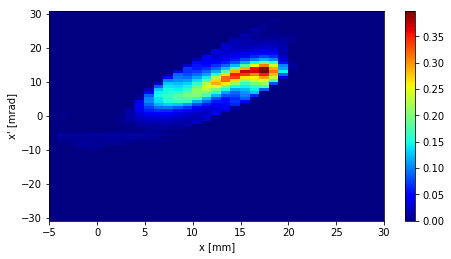

x_cen = 12.402737615441744 mm
xp_cen = 9.893335605127678 mrad
x_rms = 4.101499764832173 mm
xxp = 14.287823056173533 mm-mrad
xp_rms = 5.010673486910687 mrad
x_emit_normalized = 0.07498108908098303 mm-mrad
alpha = -0.967220940811758 
beta = 1.1387935782131784 m
gamma = 1.6996200060960125 1/m
total projected current = 31.99220699692518 A


In [ ]:
scan_analysis = AllisonScannerAnalysis.ASData(scanner = scanner,
                              I_grid = data_grid.I_grid,
                              X_grid = data_grid.X_grid,
                              V_grid = data_grid.V_grid,
                              name = data_grid.name,
                              threshold_sigma = threshold_sigma,
                              noise_gradient = noise_gradient,
                              correction = correction)

In [ ]:
AllisonScannerAnalysis.save_output(perform_scan = perform_scan, 
            results = scan_analysis.parameters_dict, 
            name = data_grid.name)

### Reset Scanner

In [ ]:
if perform_scan:
    AllisonScannerAnalysis.ASReset(pv_dict = pv_dict)